<a href="https://colab.research.google.com/github/pedrohcmds/obitos_covid_ms/blob/main/notebooks/An%C3%A1lise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importanto Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setando Configurações gerais de gráficos

In [4]:
sns.set_style('darkgrid')

# Importando dados já tratados

In [5]:
dados = pd.read_csv('https://raw.githubusercontent.com/pedrohcmds/obitos_covid_ms/main/dados/dados_tratados_ms_2020.csv')


In [6]:
dados.drop('state', axis=1, inplace=True)


# Formatando a data e renomeanndo as colunas

In [7]:
dados.columns = ['data',
                 'novos_obitos_por_covid19',
                 'total_obitos_por_covid19',
                 'total_de_obitos',
                 'obitos_por_demais_causas',
                 'obitos_por_falha_respiratoria',
                 'obitos_por_causa_indeterminada',
                 'obitos_por_pneumonia',
                 'obitos_por_sars',
                ]

In [8]:
dados.data = pd.to_datetime(dados.data)

# Verificando dados não válidos

In [9]:
dados.isna().sum()

data                                0
novos_obitos_por_covid19          131
total_obitos_por_covid19            0
total_de_obitos                     0
obitos_por_demais_causas            2
obitos_por_falha_respiratoria      11
obitos_por_causa_indeterminada    313
obitos_por_pneumonia                3
obitos_por_sars                   294
dtype: int64

# Preenchendo colunas com NAN com 0

In [10]:
dados.fillna(0, inplace=True)

In [11]:
dados.isna().sum()

data                              0
novos_obitos_por_covid19          0
total_obitos_por_covid19          0
total_de_obitos                   0
obitos_por_demais_causas          0
obitos_por_falha_respiratoria     0
obitos_por_causa_indeterminada    0
obitos_por_pneumonia              0
obitos_por_sars                   0
dtype: int64

# Criando coluna com o número parcial de novos óbitos

In [12]:
dados['novos_obitos'] = dados.total_de_obitos.diff()

In [13]:
dados.novos_obitos.fillna(0, inplace=True)

In [14]:
dados.head()

,data,novos_obitos_por_covid19,total_obitos_por_covid19,total_de_obitos,obitos_por_demais_causas,obitos_por_falha_respiratoria,obitos_por_causa_indeterminada,obitos_por_pneumonia,obitos_por_sars,novos_obitos
0,2020-01-01,0.0,0,37,15.0,5.0,0.0,11.0,1.0,0.0
1,2020-01-02,0.0,0,68,18.0,3.0,0.0,5.0,0.0,31.0
2,2020-01-03,0.0,0,107,21.0,6.0,0.0,7.0,0.0,39.0
3,2020-01-04,0.0,0,148,18.0,4.0,0.0,11.0,0.0,41.0
4,2020-01-05,0.0,0,184,22.0,5.0,0.0,4.0,0.0,36.0


# Estatísticas Descritivas

In [15]:
dados.describe()

,novos_obitos_por_covid19,total_obitos_por_covid19,total_de_obitos,obitos_por_demais_causas,obitos_por_falha_respiratoria,obitos_por_causa_indeterminada,obitos_por_pneumonia,obitos_por_sars,novos_obitos
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000
mean,6.147541,635.606557,8220.265027,22.896175,3.732240,0.155738,8.489071,0.23224,46.601093
std,6.861054,767.959191,5129.059675,5.848324,1.942855,0.392124,3.538228,0.52671,12.068953
min,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,3863.000000,19.000000,2.000000,0.000000,6.000000,0.00000,39.000000
50%,3.000000,112.500000,7633.000000,23.000000,4.000000,0.000000,8.000000,0.00000,46.000000
75%,12.000000,1388.750000,12770.000000,27.000000,5.000000,0.000000,11.000000,0.00000,55.000000
max,29.000000,2250.000000,17093.000000,43.000000,11.000000,2.000000,19.000000,4.00000,88.000000


### Visualização das Variáveis no tempo

In [16]:
def grafico_de_evolucao(coluna):
    nome_da_coluna = coluna.replace('_', ' ').title()
    ax = sns.lineplot(y=dados[coluna], x=dados.data, data=dados)
    ax.figure.set_size_inches(8,6)
    ax.set_title(f'Gráfico de Ecolução de {nome_da_coluna} X Tempo', fontsize=18)
    ax.set_ylabel(nome_da_coluna)
    ax.set_xlabel('Tempo')

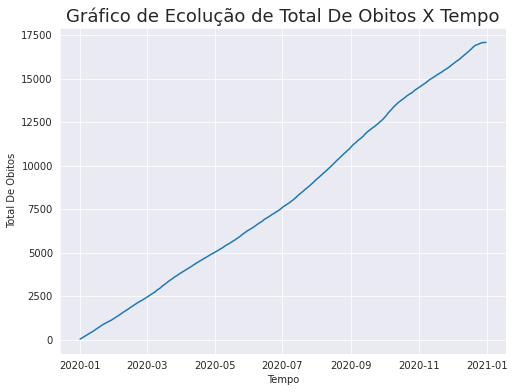

In [17]:
grafico_de_evolucao('total_de_obitos')

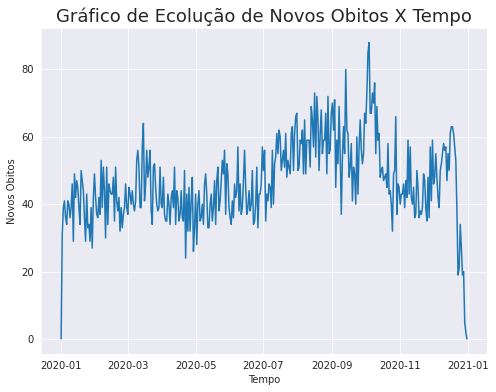

In [18]:
grafico_de_evolucao('novos_obitos')

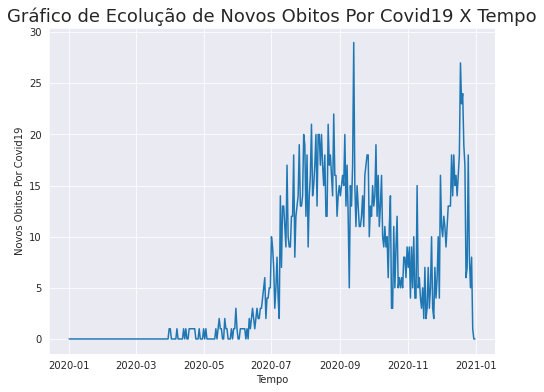

In [19]:
grafico_de_evolucao('novos_obitos_por_covid19')

In [26]:
dados['media_movel_de_obitos_por_covid19'] = dados['novos_obitos_por_covid19'].rolling(window=7, center=False).mean()

## Decisão do foco de pesquisa:

Essa pesquisa se focará na série temporal de novos óbitos confirmados de COVID-19 (novas_mortes_covid_19).  Sendo o objetivo prever esse número a partir das outras causas relacionadas ao COVID-19

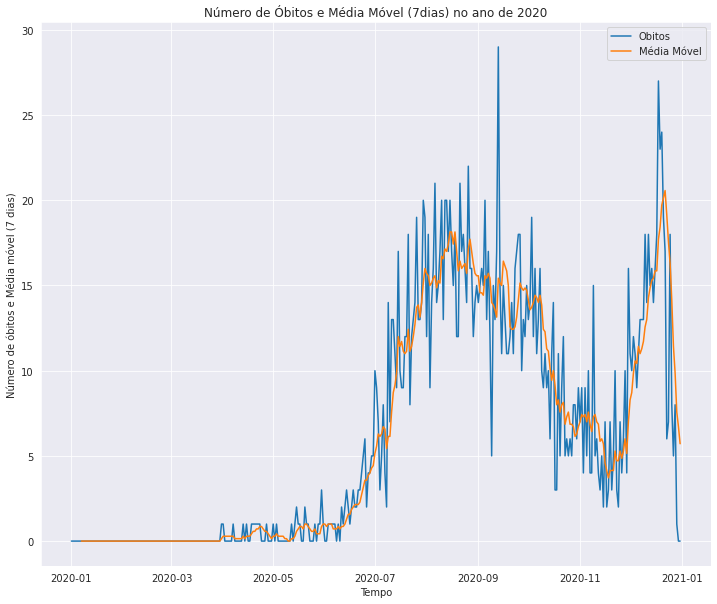

In [33]:
ax = sns.lineplot(x='data', y='novos_obitos_por_covid19', data=dados, label='Obitos')
ax = sns.lineplot(x='data', y='media_movel_de_obitos_por_covid19', data=dados, label='Média Móvel')
ax.figure.set_size_inches(12,10)
ax.set_title('Número de Óbitos e Média Móvel (7dias) no ano de 2020')
ax.set_xlabel('Tempo')
ax.set_ylabel('Número de óbitos e Média móvel (7 dias)')
ax.legend()

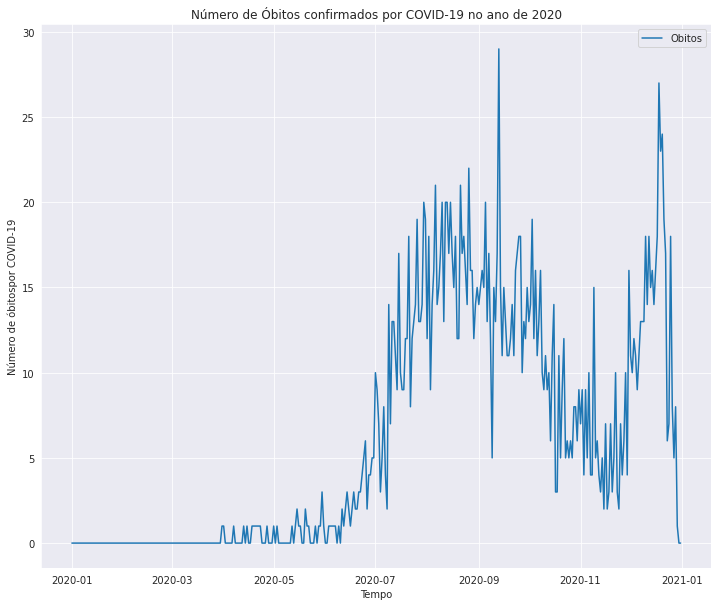

In [32]:
ax = sns.lineplot(x='data', y='novos_obitos_por_covid19', data=dados, label='Obitos')
ax.figure.set_size_inches(12,10)
ax.set_title('Número de Óbitos confirmados por COVID-19 no ano de 2020')
ax.set_xlabel('Tempo')
ax.set_ylabel('Número de óbitospor COVID-19')
ax.legend()

In [34]:
dados.to_csv('dados_para_analise.csv', index=False)